In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
import numpy as np

M=3577297
query_type = "rank"
TARGETS = [0, 3, 4, 5, 6, 7]
EPS = [0.01 ,0.05, 0.1, 0.2]


def add_flame_data(t, e):
    profile_file = f"../data/profile_t_{t}-e_{e}.csv"
    
    df_flame = pd.read_csv(profile_file)
    return df_flame.values[0]



In [74]:
###Baseline###
df_list = []
for t in TARGETS:
    
    dres = pd.read_csv(f"../data/BASELINE_{query_type.upper()}_T_{t}.csv", names=[query_type])
    dquery = pd.read_csv(f"../data/INPUT_query_{query_type}_t_{t}.csv", names=["query_val"])
    df = pd.concat([dres,dquery], axis=1)
    df['target'] = t

    dtime = pd.read_csv("../data/baseline_qdis_trace.csv")

    dtime = dtime.reset_index()
    dtime.columns = ['target', 'query', 'tamanho', 'tempo_queries', 'tempo_inicio', 'tempo_fim', 'tmp']
    
    dtmp = dtime[dtime['query'] == 'rank']
    dtmp = pd.DataFrame(dtmp.values[:,[0,1,3,4,5,6]])
    dtmp.columns =  ['target', 'query', 'tamanho', 'tempo_queries', 'tempo_inicio', 'tempo_fim']

    dtime = pd.concat([dtmp,dtime[dtime['query'] == 'quantil']])

    df = df.set_index('target').join(dtime[dtime["query"]==query_type].set_index('target'))
    df['tempo_inicio'] = df['tempo_inicio'].astype('datetime64[ns]')
    df['tempo_fim'] = df['tempo_fim'].astype('datetime64[ns]')
    df['tempo_exec'] = (df['tempo_fim'] - df['tempo_inicio'])
    df.drop(['tempo_inicio', 'tempo_fim'], axis=1, inplace=True)
    
    df_list.append(df.reset_index())
df_base = pd.concat(df_list)
print(df_base)

    target     rank   query_val query tamanho tempo_queries  tmp tempo_exec
0        0  2010128      865288   NaN     NaN           NaN  NaN        NaT
1        0  3072040     1323865   NaN     NaN           NaN  NaN        NaT
2        0   909760      369891   NaN     NaN           NaN  NaN        NaT
3        0  3386695     1452570   NaN     NaN           NaN  NaN        NaT
4        0  2041826      879845   NaN     NaN           NaN  NaN        NaT
..     ...      ...         ...   ...     ...           ...  ...        ...
95       7  3577295   584324440   NaN     NaN           NaN  NaN        NaT
96       7  3577295   977391916   NaN     NaN           NaN  NaN        NaT
97       7  3577295  1014621317   NaN     NaN           NaN  NaN        NaT
98       7  3577262   883623759   NaN     NaN           NaN  NaN        NaT
99       7  3577287    85037170   NaN     NaN           NaN  NaN        NaT

[600 rows x 8 columns]


In [75]:
def add_flame_data(t, e):
    profile_file = f"../data/profile_t_{t}-e_{e}.csv"
    
    df_flame = pd.read_csv(profile_file)
    try:
        res = df_flame.values[0][0]
    except:
        res = np.nan
    return res

###QDIGEST###
df_list = []
for t in TARGETS:
    for e in EPS:
        profile_file = f"../data/profile_t_{t}-e_{e}.csv"
        
        dres = pd.read_csv(f"../data/QDIGEST_{query_type.upper()}_T_{t}-E_{e}.csv", names=[query_type])
        dquery = pd.read_csv(f"../data/INPUT_query_{query_type}_t_{t}.csv", names=["query_val"])
        df = pd.concat([dres,dquery], axis=1)
        df['target'] = t
        df['epsilon'] = e
        df = df.set_index(["target", "epsilon"])
        dtime = pd.read_csv("../data/q-digest_profile_trace.csv")
        dtime = dtime.set_index(['target', 'epsilon'])
        df = df.join(dtime[dtime["query"] == query_type])
        df['tempo_inicio'] = df['tempo_inicio'].astype('datetime64[ns]')
        df['tempo_fim'] = df['tempo_fim'].astype('datetime64[ns]')
        df['tempo_exec'] = (df['tempo_fim'] - df['tempo_inicio'])
        #print(pd.read_csv(profile_file))
        df.drop(['tempo_inicio', 'tempo_fim'], axis=1, inplace=True)
        df['mem'] = add_flame_data(t,e)
        df_list.append(df.reset_index())
df_gk = pd.concat(df_list)

In [76]:
df_gk.dtypes

target                  int64
epsilon               float64
rank                    int64
query_val               int64
query                  object
tempo_exec    timedelta64[ns]
mem                   float64
dtype: object

In [77]:
df_base = df_base.set_index(["target", "query_val"])
df_base["epsilon"] = 0
df_gk = df_gk.set_index(["target", "query_val"])

#df_base["erro"] = abs(df_base["rank"] - df_base["rank"] )
#df_base["erro_max"] =  df_base["epsilon"] * M

#df_gk["erro"] = abs(df_gk["rank"] - df_gk["rank"] )
#df_gk["erro_max"] =  df_gk["epsilon"] * M

df = df_base.join(df_gk, lsuffix="_baseline")
#df = df_gk

In [78]:
df.dtypes

rank_baseline                    int64
query_baseline                  object
tamanho                         object
tempo_queries                   object
tmp                            float64
tempo_exec_baseline    timedelta64[ns]
epsilon_baseline                 int64
epsilon                        float64
rank                             int64
query                           object
tempo_exec             timedelta64[ns]
mem                            float64
dtype: object

In [79]:
df

rank_baseline query_baseline tamanho tempo_queries  tmp  \
target query_val                                                             
0      8383                19937            NaN     NaN           NaN  NaN   
       8383                19937            NaN     NaN           NaN  NaN   
       8383                19937            NaN     NaN           NaN  NaN   
       8383                19937            NaN     NaN           NaN  NaN   
       9356                22404            NaN     NaN           NaN  NaN   
...                          ...            ...     ...           ...  ...   
7      1340451999        3577150            NaN     NaN           NaN  NaN   
       1343031158        3577280            NaN     NaN           NaN  NaN   
       1343031158        3577280            NaN     NaN           NaN  NaN   
       1343031158        3577280            NaN     NaN           NaN  NaN   
       1343031158        3577280            NaN     NaN           NaN  NaN   

                  tempo_exec_baseline  epsilon_baseline  epsilon     rank  \
target query_val                                                            
0      8383                       NaT                 0     0.01    14159   
       8383                       NaT                 0     0.05        0   
       8383                       NaT                 0     0.10        0   
       8383                       NaT                 0     0.20        0   
       9356                       NaT                 0     0.01    15994   
...                               ...               ...      ...      ...   
7      1340451999                 NaT                 0     0.20  3526452   
       1343031158                 NaT                 0     0.01  3562078   
       1343031158                 NaT                 0     0.05  3549655   
       1343031158                 NaT                 0     0.10  3541921   
       1343031158                 NaT                 0     0.20  3526452   

                  query                tempo_exec        mem  
target query_val                                              
0      8383        rank 0 days 00:00:05.244967908  2358144.0  
       8383        rank 0 days 00:00:05.187818039  1732224.0  
       8383        rank 0 days 00:00:05.053122499  1910976.0  
       8383        rank 0 days 00:00:05.283462270     2368.0  
       9356        rank 0 days 00:00:05.244967908  2358144.0  
...                 ...                       ...        ...  
7      1340451999  rank 0 days 00:00:02.791349519        NaN  
       1343031158  rank 0 days 00:00:02.937531164        NaN  
       1343031158  rank 0 days 00:00:02.867962551        NaN  
       1343031158  rank 0 days 00:00:02.805750313        NaN  
       1343031158  rank 0 days 00:00:02.791349519        NaN  

[4560 rows x 12 columns]

In [80]:
print(df.columns)
df["erro"] = abs(df[f"rank_baseline"] - df["rank"] )
df["erro_max"] =  df["epsilon"] * M
10000
#df_gk = df_gk.reset_index()
#df_base = df_base.reset_index()

df = df.reset_index()

len(df)

Index(['rank_baseline', 'query_baseline', 'tamanho', 'tempo_queries', 'tmp',
       'tempo_exec_baseline', 'epsilon_baseline', 'epsilon', 'rank', 'query',
       'tempo_exec', 'mem'],
      dtype='object')


4560

In [81]:
df["tempo_exec_int"] = df["tempo_exec"].astype("int")/1000000000

In [ ]:
df["tempo_update"] = df["proc_update"] * df["tempo_exec_int"]
df["tempo_query"] = df["proc_queryRank"] * df["tempo_exec_int"]
df["tempo_io"] = df["proc_javaIO"] * df["tempo_exec_int"]

In [ ]:
df["tempo_exec_int_baseline"] = df["tempo_exec_baseline"].astype("int")/1000000000


df["tempo_update_baseline"] = df["proc_update_baseline"] * df["tempo_exec_int_baseline"]
df["tempo_query_baseline"] = df["proc_queryRank_baseline"] * df["tempo_exec_int_baseline"]
df["tempo_io_baseline"] = df["proc_javaIO_baseline"] * df["tempo_exec_int_baseline"]

In [82]:
#TODO tempo para montar estrutura
df_heatMap = df.drop_duplicates(subset=["epsilon", "target"])

In [83]:
dferro = df_heatMap.groupby(["target", "epsilon"])["erro"].mean().reset_index()

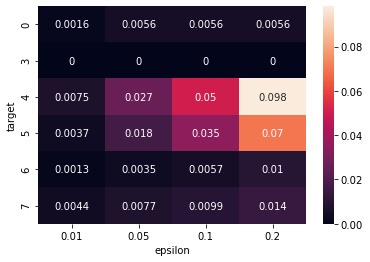

In [84]:
erro = dferro.pivot("target", "epsilon", "erro")
f = sns.heatmap(erro/M, annot=True)
f.get_figure().savefig("../img/qdigest-heatmap_ERRO")

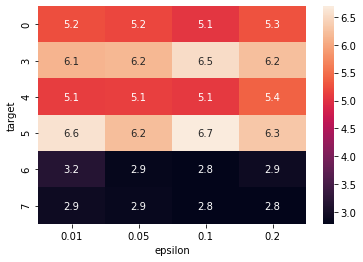

In [85]:
tempos = df_heatMap.pivot("target", "epsilon", "tempo_exec_int")
f = sns.heatmap(tempos, annot=True)
f.get_figure().savefig("../img/qdigest-heatmap_TEMPO")

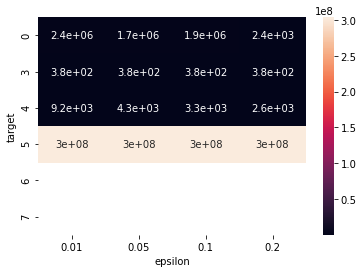

In [86]:
tempos = df_heatMap.pivot("target", "epsilon", "mem")
f = sns.heatmap(tempos, annot=True)
f.get_figure().savefig("../img/qdigest-heatmap_MEM")

In [ ]:
tempos = df_heatMap.pivot("target", "epsilon", "proc_update")
f = sns.heatmap(tempos, annot=True)
f.get_figure().savefig("../img/heatmap_PROC_UPDATE")

In [ ]:
tempos = df_heatMap.pivot("target", "epsilon", "tempo_io")
f = sns.heatmap(tempos, annot=True)
f.get_figure().savefig("../img/heatmap_TEMPO_IO")

In [ ]:
tempos = df_heatMap.pivot("target", "epsilon", "proc_javaIO")
f = sns.heatmap(tempos, annot=True)
f.get_figure().savefig("../img/heatmap_PROC_IO")

In [ ]:
df.head()

/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.war

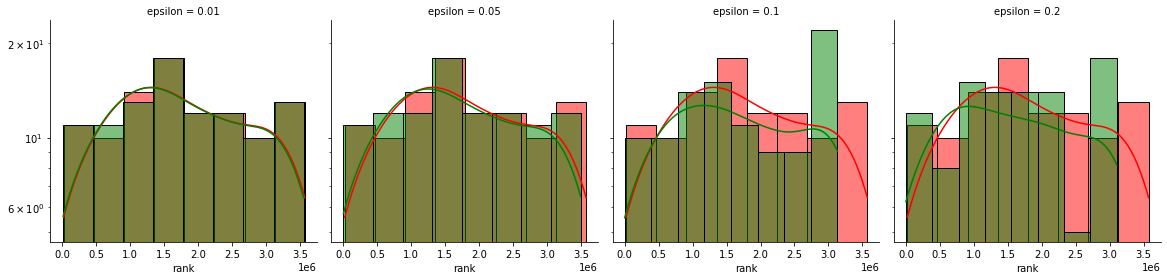

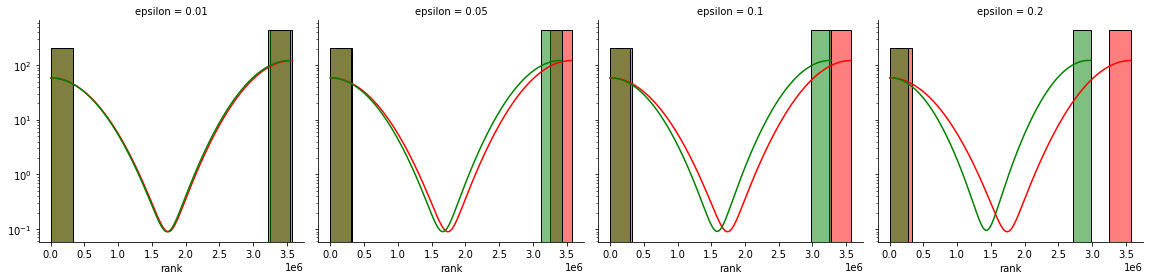

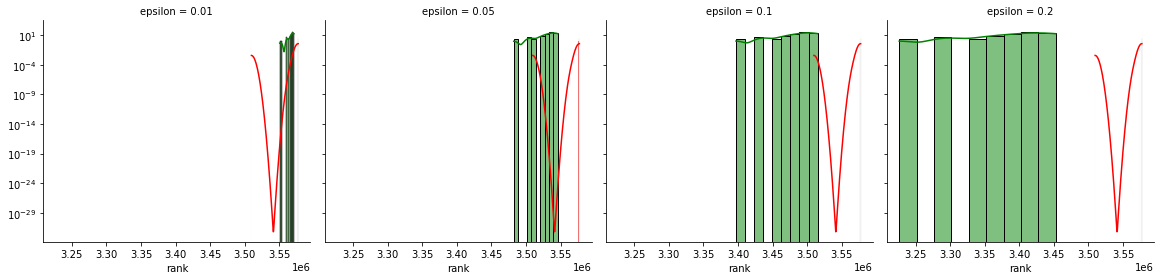

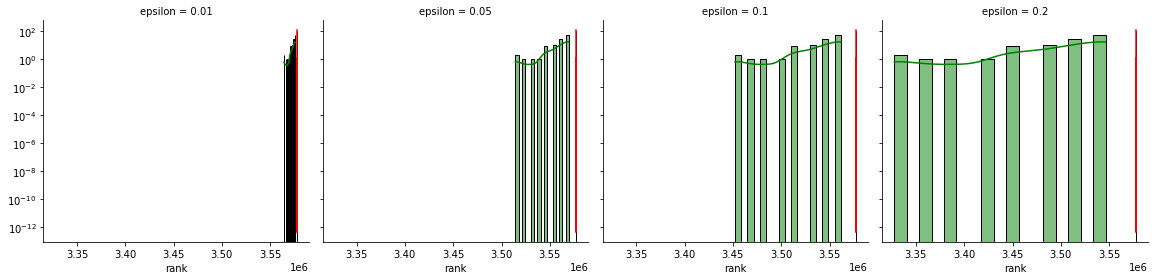

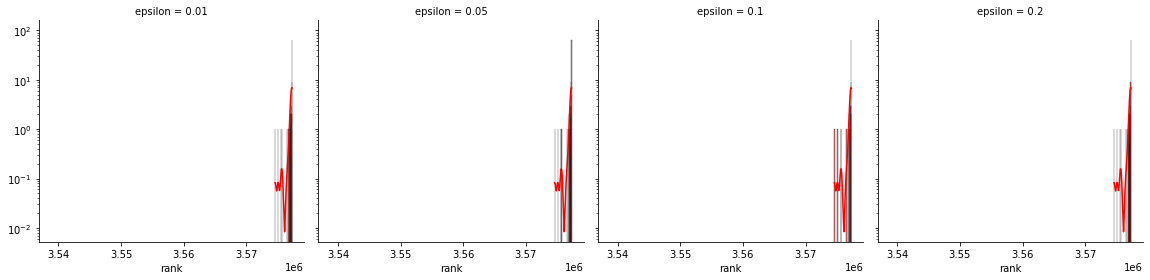

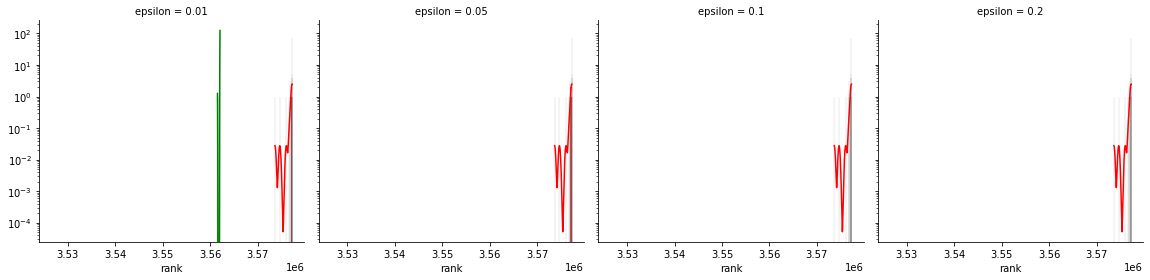

In [57]:
for t in TARGETS:
    g = sns.FacetGrid( df[(df["target"]==t)], col="epsilon", height=4)
    g.map(sns.histplot, f"{query_type}_baseline", kde=True, color="red")
    g.map(sns.histplot, query_type, kde=True, color ="green")
    #g.map(sns.histplot, "query_val", kde=True, color ="green")
    g.set(yscale='log')
    g.savefig(f"../img/qdigest-histograma_distrib_{query_type.upper()}_t_{t}")

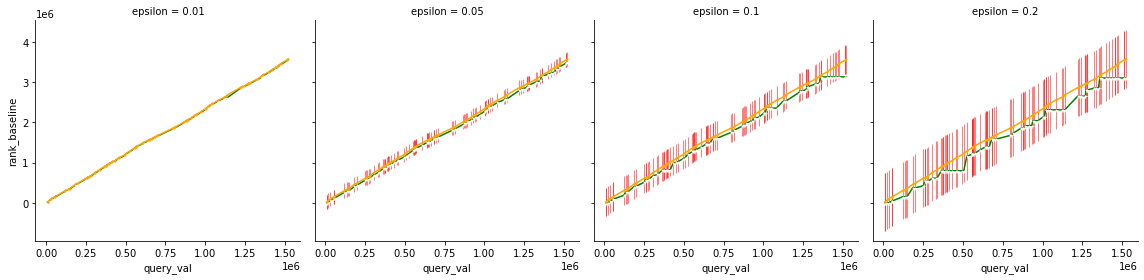

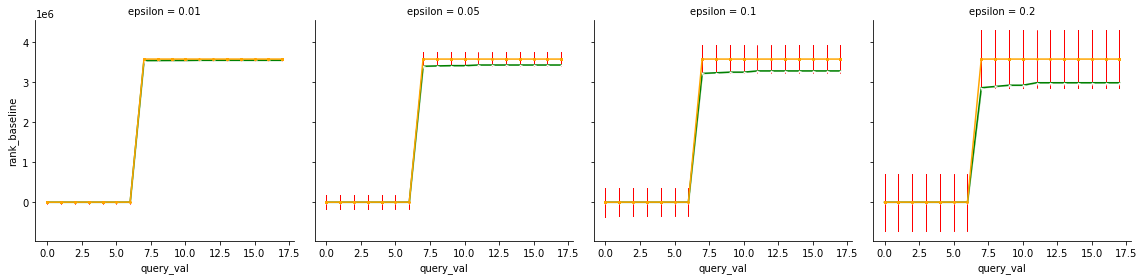

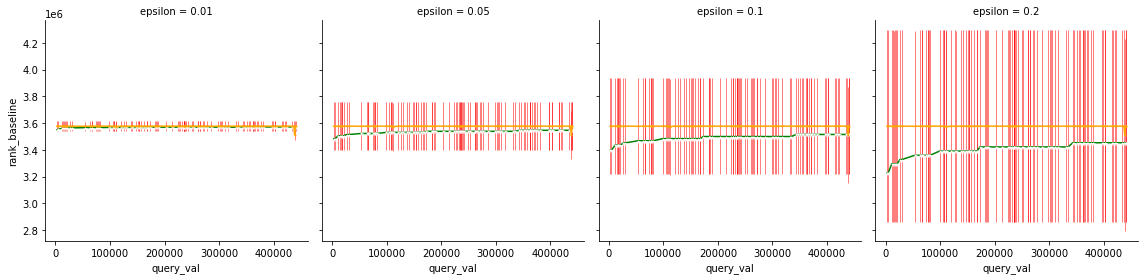

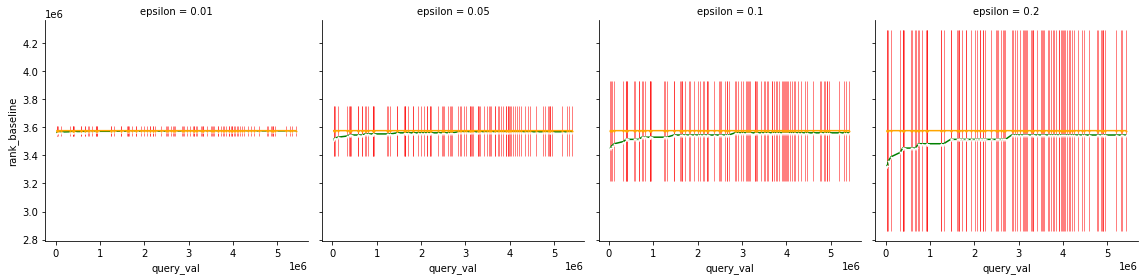

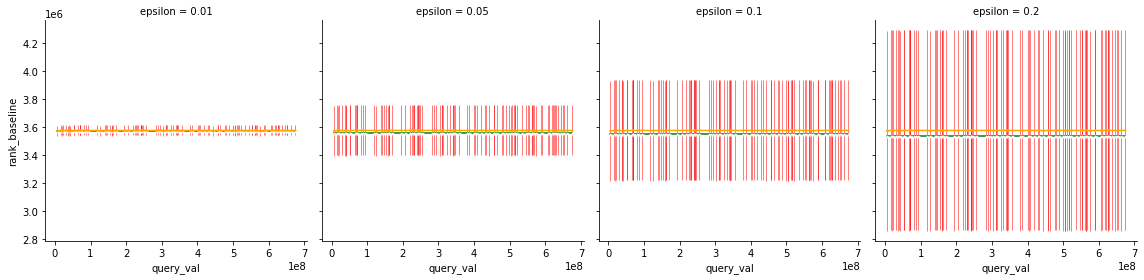

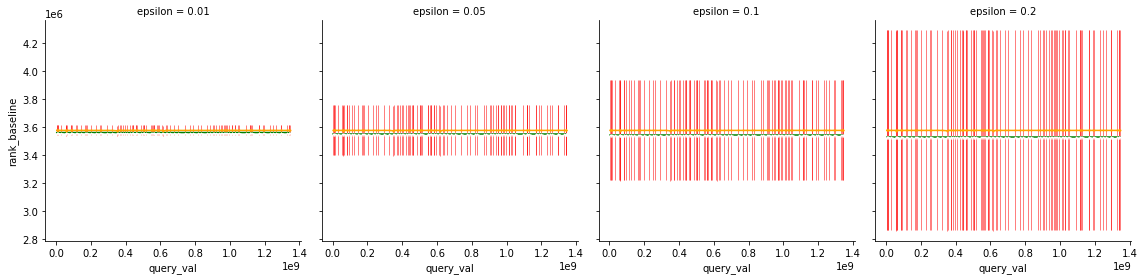

In [58]:
for t in TARGETS:
    g = sns.FacetGrid( df[(df["target"]==t)], col="epsilon", height=4)
    g.map(sns.lineplot, "query_val", "rank", 
          marker="+", color="green", markersize=3)
    g.map(plt.errorbar, "query_val", "rank_baseline", 
          "erro_max", marker=".", ecolor="red", 
          elinewidth=0.5, markersize=2, color="orange")
    g.savefig(f"../img/qdigest-erroplot_ecdf_{query_type.upper()}_t_{t}")

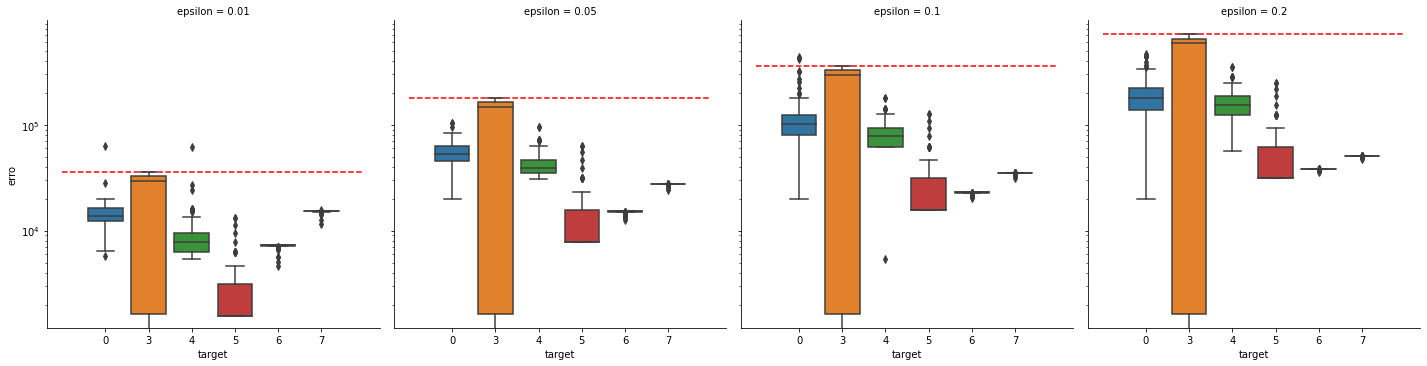

In [59]:
g = sns.catplot(
        data=df, x='target', y="erro",
        col='epsilon', kind='box'
)
#g.set(yscale="log")
for i in range(len(EPS)):
    e=EPS[i]
    g.axes[0][i].hlines(y=M*e,xmin=-1, xmax=len(TARGETS),colors = ["red"], linestyles="dashed")
g.set(yscale="log")
g.savefig(f"../img/qdigest-boxplot_{query_type}_ERROS")